<a href="https://colab.research.google.com/github/Irina-64/AML-22_ZAK-9/blob/main/%D0%94%D0%97_3_%D0%9E%D1%82%D1%87%D0%B5%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Метод оценки качества вин на основе алгоритмов машинного обучения

*Отчет по проведенной домашней работе в курсе "Методология ведения DS-проектов" на платформе "Нетология"*

### **Трубчик И.С., ДГТУ, г. Ростов-на-Дону**, trubchik@mail.ru

Scopus ID: 6506440065

### Аннотация

Целью работы было найти наиболее выгодный с точки зрения временных затрат и точности способ классификации португальских вин «Vinho Verde» на три категории качества: "плохие", "нормальные" или "отличные". В работе, на основе небольшого анализа данных, предоставленных для исследования на платформе [Kaggle](https://www.kaggle.com/rajyellow46/wine-quality), показан выбор алгоритма, позволяющего делать выводы о качестве вин с достаточно высокой степенью точности.

### Введение

<p>Методы интеллектуального анализа данных (DM) направлены на извлечение знаний из необработанных данных. Было разработано несколько алгоритмов DM, каждый из которых имеет свои преимущества и недостатки (Witten and Frank, 2005).
Подходы DM применялись к большому количеству задач преимущественно методами  классификации или регрессии. Внимание нескольких исследователей привлекла задача предсказания качества вина (Cortez et al., 2009; Yin and Han, 2003).</p>
<p>Винодельческая промышленность инвестирует в новые технологии производства и продажи вина. Ключевым вопросом в этом контексте является сертификация вин, которая предотвращает незаконную фальсификацию и гарантирует качество вина. Сертификация вин часто проводится с помощью физико-химических и сенсорных тестов (Ebeler, 1999). Однако взаимосвязь между физико-химическим и органолептическим анализом до сих пор до конца не изучена (Легин и др., 2003).
Вот почему методы DM могут быть очень полезными для решения этой проблемы.</p> <p>Разработка точной, вычислительно эффективной и понятной модели прогнозирования может быть очень полезной для винодельческой отрасли. С одной стороны, хороший прогноз качества вина может быть очень полезен на этапе сертификации, поскольку в настоящее время органолептический анализ проводится людьми-дегустаторами, что явно является субъективным подходом. Автоматическая система прогнозирования может быть интегрирована в систему поддержки принятия решений, что способствует повышению скорости и качества работы энолога. С другой стороны, такая система прогнозирования также может быть полезна для обучения студентов-энологов или в маркетинговых целях.</p>
<p>Кроме того, процесс выбора функций может помочь проанализировать влияние аналитических тестов. Если делается вывод, что несколько входных переменных имеют большое значение для прогнозирования качества вина, поскольку в процессе производства некоторые переменные можно контролировать, эту информацию можно использовать для улучшения качества вина.</p>


### 1. Анализ данных

В основу численного эксперимента были взяты данные из репозитория машинного обучения UCI.

В таблице присутствуют два набора данных, относящихся к красному и белому вариантам португальского вина «Vinho Verde». Подробнее см. в ссылке [Cortez et al., 2009]. Из-за проблем с конфиденциальностью и логистикой для анализа  доступны только физико-химические (входные) и органолептические (выходные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т. д.).

В частности, для оценки вин использовались следующие 11 характеристик:

- 1 - fixed acidity (большинство кислот, связанных с вином, либо фиксированные, либо нелетучие (легко не испаряются))
- 2 - volatile acidity (количество уксусной кислоты в вине, которая при слишком высоком уровне может привести к неприятному "уксусному" вкусу)
- 3 - citric acid (Лимонная кислота, содержащаяся в небольших количествах, может придать вину «свежесть» и аромат)
- 4 - residual sugar (количество сахара, оставшееся после прекращения брожения, редко можно найти вина с содержанием сахара менее 1 г/л, а вина с содержанием сахара более 45 г/л считаются сладкими)
- 5 - chlorides (количество соли в вине)
- 6 - free sulfur dioxide (свободная форма SO^2 (диоксида серы) существует в равновесии между молекулярным SO^2 (в виде растворенного газа) и бисульфит-ионом; предотвращает рост микробов и окисление вина)
- 7 - total sulfur dioxide (количество свободных и связанных форм диоксида серы; при низких концентрациях диоксида серы практически не обнаруживается в вине, но при концентрациях свободного диоксида серы более 50 частей на миллион диоксида серы становится заметным в аромате и вкусе вина)
- 8 - density (плотность воды близка к плотности воды в зависимости от процентного содержания спирта и сахара)
- 9 - pH (описывает, насколько кислым или щелочным является вино по шкале от 0 (очень кислое) до 14 (очень щелочное); большинство вин имеют рН от 3 до 4 по шкале pH)
- 10 - sulphates (добавка к вину, которая может способствовать повышению уровня газообразного диоксида серы (SO2), действующая как антимикробное и антиоксидантное средство)
- 11 - alcohol (процент содержания алкоголя в вине)

Целевая переменная (по данным сенсорной оценки):
- quality (оценка от 0 до 10)

При помощи тепловой карты можно оценить степень влияния некоторых характеристик на уровень качества

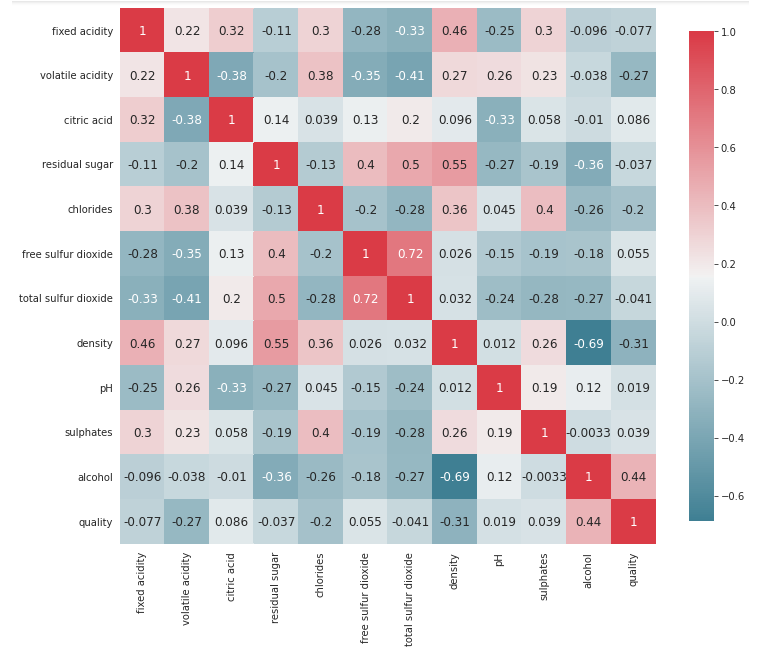

На этой диаграмме видно, что наибольшие значения корреляции у такой характеристики, как уровень алкоголя в вине. Также просматриваются связи между некоторыми характеристиками (содержание диоксида серы в виде свободных форм с общим количеством этого показателя, плотность воды близка в зависимости от количество сахара, оставшегося после прекращения брожения, и так далее). 

Все это позволяет сделать гипотезы о мере важности ряда показателей в данных на результат оценки качества вина.

Также было проведено исследование на качественный состав данных. А именно, на присутствие пропущенных значений и "выбросов" в данных. Было выяснено, что процент пропущенных значений в общем объеме данных весьма незначителен (порядка 0.04%), что позволило с утверждать о том, что данные, содержащие пропуски, можно удалить их общей таблицы, не беспокоясь о качестве проводимого численного исследования.

Также можно избавиться от "излишней" информации в данных, благодаря найденной очевидной взаимосвязи некоторых характеристик. В частности, был сделан вывод о возможности не рассматривать в эксперименте характеристику 'total sulfur dioxide' (общий диоксид серы).

Поскольку данные в исходном наборе -- несбалансированы (т.е. есть параметры, которые имеют большие диапазоны по сравнению с другими), то после удаления части неважных данных и проведения кодирования категориальных переменных, для остальной части датасета была проведена  нормализация каждой характеристики так, чтобы ее значения находились в диапазоне [0, 1].

Полученные в результате предобработки данные были разбиты на обучаумую (train) и тестовую (test) части в отношении 0.8/0.2 . Далее был проведен ряд численных экспериментов, целью которых было выяснить наиболее точно отвечающий поставленной задаче алгоритмический метод исследования данных в этой предметной области.

### 2. Моделирование

Для оценки качества методов была написана следующая функция, которая вычисляет RMSE между тестовыми и прогнозируемыми значениями:

```
def get_rmse(y_test, predictions):
    return mean_squared_error(y_test, predictions) ** 0.5
```

#### 2.1 Первый этап: поиск наилучших параметров в модели RandomForestRegressor

В следующих 6 экспериментах была проверена взаимосвязь между каждым параметром модели RandomForestRegressor и RMSE, при обучении 10-20 моделей в каждом эксперименте с одинаковыми параметрами, за исключением параметра, который необходимо было проверить изначально. Затем каждая модель сделала прогнозы,  оцененные функцией get_rmse().

```
# Creating the 20 models
max_samples =  [0.05 + i*0.049 for i in range(20)]
models_max_samples = [RandomForestRegressor(max_samples = max_samples[i], random_state = 42) for i in range(20)]

max_samples_rmses = []

# Fitting the models and making predictions
for model in models_max_samples:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    max_samples_rmses += [rmse]
    print(f"RMSE of model with max_samples={model.max_samples}: {rmse:.5f}")
```


---


*!!! Здесь будет вставлен рисунок с графиком, на котором собраны все RMSE для 6 подходов...*

---



В соответствии с полученными результатами была построена окончательную модель с параметрами, которые дали наилучшие оценки. В частности, наилучшими показателями стали:

- best_n_estimators = 450
- best_max_depth = 20
- best_min_samples_split = 2
- best_max_leaf_nodes = 1000
- best_min_samples_leaf = 1
- best_max_samples = 0.981

#### 2.2 Разработка и обучение оптимизированной модели на основе GridSearchCV

В соответствии с общим диапазоном каждого из параметров, мы соответственно выбрали по три значения:

```
param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [20, 30, 40],
              'min_samples_split': [2, 500, 1000],
              'max_leaf_nodes': [333, 666, 1000],
              'min_samples_leaf': [1, 50, 100],
              'max_samples': [0.33,0.66,0.9810000000000001]}
```
И затем, с помощью алгоритма GridSearchCV были проверены найденные оптимальные параметры. 



#### 2.3 Сравнение двух подходов при решении задачи 

Для сравнения были запущены агоритм RandomForest для модели, которая была выбрана в соответствии с полученными графиками, и для модели, созданой по результатам работы GridSearch. Проверка проводилась в соответствии с критерием оптимальности - RMSE. Расчет oob_score показал, что точность первой модели даже немного превышает точность второй.

```
Accuracy according to RMSE for Random Forest 89.55
Accuracy according to RMSE for Random Forest using the results of GridSearchCV 89.46
```



### Заключение

Таким образом, на примере численного анализа данных, полученных по набору физико-химических (входных) и органолептических (выходных) показателей, можно утверждать 
1.   о возможности предсказания качества вина методами машинного обучения;
2.   наиболее точным методом для предсказания качества вина является задача регрессии методом RandomForestRegressor .

